<h1>Mini Projeto 06 - Bilheteria dos Filmes até 2020. </h1>
<i> 
• Carregar arquivo CSV <br>
• Tamanho do dataset (linhas e colunas)<br>
• Tipos das colunas <br>
• Análise geral dos arquivos <b>(describe)</b><br>
• Descobrir se existe um lixo na coluna Data de Lançamento <br>
• Alterar a data de Lançamento para DATA <br>
• Quantidade de lançamento de filmes em cada ano <br>
• Gráfico: Quantidade de Filmes por Ano <br>
• Exibir os 5 filmes com maior renda R$ <br>
</i>

<br>Fonte de dados: <b> Observatório Brasileiro do Cinema e do Audiovisual</b><br>
site:https://oca.ancine.gov.br/cinema

In [1]:
#Importando o Pandas, Importando o Excel 
#Importando o Matplotlib para criar gráfico
#skiprows -> principais linhas a serem removidas
#skipfooter -> últimas linhas removidas
#sep -> separador (Tem CSV que é ; outros | e etc)
#encoding= ->  é um tipo de codificação binária que aceita acentuação

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


#ataset = pd.read_csv('Filmes.csv',sep=';',encoding='ANSI',skiprows=2, skipfooter=23)
dataset = pd.read_csv('Filmes.csv',sep=';',skiprows=2, skipfooter=23, encoding='ANSI', engine='python')

#Exibir as 2 primeiras Linhas
display(dataset.head(2))

#Exibir as 2 últimas linhas
display(dataset.tail(2))




,Ano de exibição,Semana de exibição,CPB/ROE,Título da obra,Gênero,País(es) produtor(es) da obra,Nacionalidade da obra,Data de Lançamento,Distribuidora,Origem da empresa distribuidora,Número de salas na semana dos dados,Público na semana dos dados,Renda (R$) na semana dos dados
0,2009,semana 01,B0400084200000,Dragão da Maldade Contra o Santo Guerreiro,Ficção,Brasil,Brasileira,30/05/2008,RioFilme,Distribuição Nacional,1.0,32,"344,00"
1,2009,semana 01,B0700678800000,5 Frações de uma Quase História,Ficção,Brasil,Brasileira,09/05/2008,Usina Digital,Distribuição Nacional,1.0,24,"120,50"


,Ano de exibição,Semana de exibição,CPB/ROE,Título da obra,Gênero,País(es) produtor(es) da obra,Nacionalidade da obra,Data de Lançamento,Distribuidora,Origem da empresa distribuidora,Número de salas na semana dos dados,Público na semana dos dados,Renda (R$) na semana dos dados
63836,2020,semana 53,E2000476200000,Quando Hitler Roubou O Coelho Cor-De-Rosa,Ficção,Alemanha,Estrangeira,10/12/2020,A2 Filmes,Distribuição Nacional,3.0,56,"1.079,92"
63837,2020,semana 53,E2000480400000,O Céu Da Meia-Noite,Ficção,Estados Unidos,Estrangeira,10/12/2020,O2 Play,Distribuição Nacional,2.0,15,"283,98"


<h3> Tamanho do dataset, e os tipos das colunas </h3>

In [2]:
print(dataset.dtypes)
print('\n')

#SHAPE (nº de linhas,nº de colunas )
shape = dataset.shape
print(shape)
print('linhas,colunas')

Ano de exibição                          int64
Semana de exibição                      object
CPB/ROE                                 object
Título da obra                          object
Gênero                                  object
País(es) produtor(es) da obra           object
Nacionalidade da obra                   object
Data de Lançamento                      object
Distribuidora                           object
Origem da empresa distribuidora         object
Número de salas na semana dos dados    float64
Público na semana dos dados             object
Renda (R$) na semana dos dados          object
dtype: object


(63838, 13)
linhas,colunas


<h3>Descobrir se existe um <i>lixo</i> na coluna <i> Data de Lançamento </i> </h3>

In [3]:
dataset['Data de Lançamento'].value_counts()

Relançamento    682
23/10/2014      253
21/12/2012      233
05/06/2009      198
20/08/2015      198
               ... 
06/04/2007        1
22/07/2005        1
22/07/2021        1
03/08/2007        1
22/04/2005        1
Name: Data de Lançamento, Length: 919, dtype: int64

In [4]:
dataset_novo = dataset[dataset['Data de Lançamento']!='Relançamento'].copy()
display(dataset_novo.head(2))
dataset_novo.dtypes

,Ano de exibição,Semana de exibição,CPB/ROE,Título da obra,Gênero,País(es) produtor(es) da obra,Nacionalidade da obra,Data de Lançamento,Distribuidora,Origem da empresa distribuidora,Número de salas na semana dos dados,Público na semana dos dados,Renda (R$) na semana dos dados
0,2009,semana 01,B0400084200000,Dragão da Maldade Contra o Santo Guerreiro,Ficção,Brasil,Brasileira,30/05/2008,RioFilme,Distribuição Nacional,1.0,32,"344,00"
1,2009,semana 01,B0700678800000,5 Frações de uma Quase História,Ficção,Brasil,Brasileira,09/05/2008,Usina Digital,Distribuição Nacional,1.0,24,"120,50"


Ano de exibição                          int64
Semana de exibição                      object
CPB/ROE                                 object
Título da obra                          object
Gênero                                  object
País(es) produtor(es) da obra           object
Nacionalidade da obra                   object
Data de Lançamento                      object
Distribuidora                           object
Origem da empresa distribuidora         object
Número de salas na semana dos dados    float64
Público na semana dos dados             object
Renda (R$) na semana dos dados          object
dtype: object

<h3> Alterando a coluna Data de Lançamento para datatime </h3>

In [5]:
dataset_novo['Data de Lançamento'] = pd.to_datetime(dataset_novo['Data de Lançamento'])
dataset_novo.dtypes


Ano de exibição                                 int64
Semana de exibição                             object
CPB/ROE                                        object
Título da obra                                 object
Gênero                                         object
País(es) produtor(es) da obra                  object
Nacionalidade da obra                          object
Data de Lançamento                     datetime64[ns]
Distribuidora                                  object
Origem da empresa distribuidora                object
Número de salas na semana dos dados           float64
Público na semana dos dados                    object
Renda (R$) na semana dos dados                 object
dtype: object

<h3> Análise geral do dataset </h3>
<i> Contagem, Média, Desvio Padrão, Percentil, Maior e Menor </i>

In [6]:
round(dataset_novo.describe(),2)

,Ano de exibição,Número de salas na semana dos dados
count,63156.00,63156.00
mean,2014.08,36.70
std,3.31,111.86
min,2009.00,0.00
25%,2011.00,1.00
50%,2014.00,3.00
75%,2017.00,12.00
max,2020.00,999.00


<h3> Quantidade de lançamento de filmes em cada ano </h3>

In [7]:
dataset_novo['Data de Lançamento'].dt.year.value_counts()

2013    5966
2009    5823
2014    5747
2011    5677
2017    5524
2010    5493
2015    5353
2012    5313
2018    5174
2016    5006
2019    4679
2008    1548
2020    1181
2007     344
2006     166
2005      62
2004      25
2001      25
2002      21
1999      10
2003       7
1998       5
2000       4
2021       1
1987       1
1978       1
Name: Data de Lançamento, dtype: int64

<h3> Gráfico: Quantidade de Filmes por Ano </h3>


<AxesSubplot:title={'center':'Quantidade de Filmes por Ano'}, xlabel='\nAno do lançamento', ylabel='\nQuantidade de filmes exibidos'>

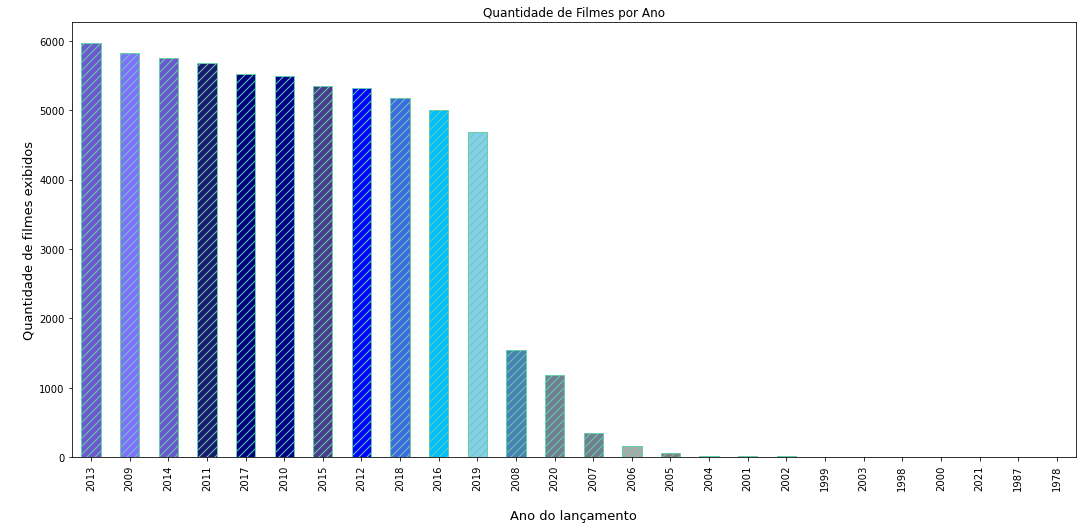

In [8]:
#Variável
filmes_ano = dataset_novo['Data de Lançamento'].dt.year.value_counts()

#Tamanho do Gráfico
plt.figure(figsize=(18,8))

#Título do Gráfico
plt.title('Quantidade de Filmes por Ano')

# Título Lateral e Título no Rodapé
plt.ylabel('\nQuantidade de filmes exibidos', fontsize='13')
plt.xlabel('\nAno do lançamento', fontsize='13')

filmes_ano.plot.bar( 
    color=['#6A5ACD','#836FFF' ,'#6959CD', '#191970','#000080', '#00008B','#483D8B','#0000FF','#4169E1','#00BFFF','#87CEEB','#4682B4','#708090','#708090','#A9A9A9','#808080','#696969','#4F4F4F','#363636','#1C1C1C','#000000'],
    edgecolor='#66CDAA', linewidth=1,hatch='///'
)   


<h3> Exibir os 5 filmes com maior renda R$ </h3> 

In [9]:
#=======================================================
#!!! Coluna de Renda está com valor padrão americano !!!

#Mudar o ponto para nada e a vírgula para ponto
dataset_novo['Renda (R$) na semana dos dados'] = dataset_novo['Renda (R$) na semana dos dados'].str.replace('.','')
dataset_novo['Renda (R$) na semana dos dados'] = dataset_novo['Renda (R$) na semana dos dados'].str.replace(',','.')

#Alterando a coluna para FLOAT
dataset_novo['Renda (R$) na semana dos dados'] = dataset_novo['Renda (R$) na semana dos dados'].astype('float64')

# Exibindo os 5 filmes com maior renda R$

dataset_novo.nlargest(5,'Renda (R$) na semana dos dados')[['Título da obra','Renda (R$) na semana dos dados','Semana de exibição','Ano de exibição','Público na semana dos dados']]


,Título da obra,Renda (R$) na semana dos dados,Semana de exibição,Ano de exibição,Público na semana dos dados
58026,Vingadores: Ultimato,161351954.0,semana 17,2019,9.098.740
52763,VINGADORES: GUERRA INFINITA,111363840.0,semana 18,2018,6.603.711
58978,O Rei Leão,109037513.0,semana 29,2019,6.502.140
58101,Vingadores: Ultimato,90058536.0,semana 18,2019,5.323.258
59037,O Rei Leão,72023724.0,semana 30,2019,4.382.106


In [60]:
dataset_nacionalidade = dataset_novo.groupby('Nacionalidade da obra').mean()['Renda (R$) na semana dos dados']

display(dataset_nacionalidade)
 

Nacionalidade da obra
Brasileira     172978.675558
Estrangeira    420469.840873
Name: Renda (R$) na semana dos dados, dtype: float64

<AxesSubplot:title={'center':'Média de Renda por Nacionalidade'}, ylabel='\n Nacionalidade'>

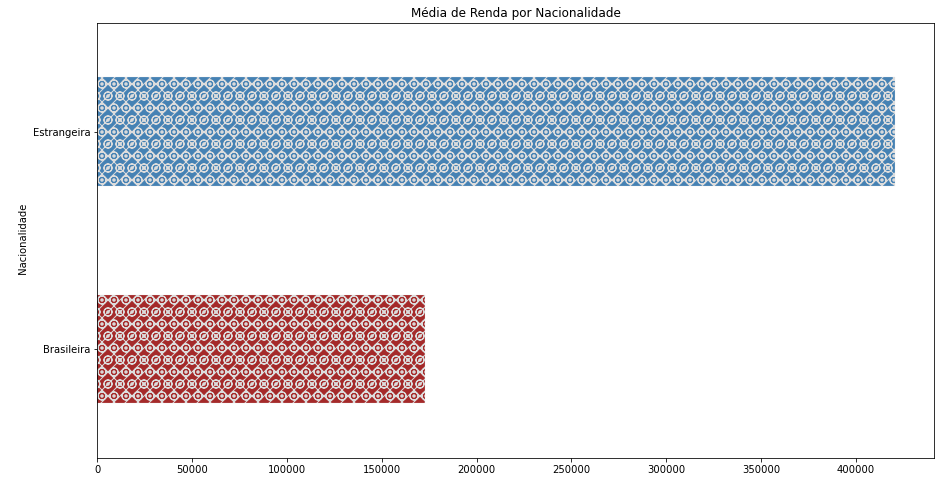

In [95]:
#Variável
#filmes_ano = dataset_novo['Data de Lançamento'].dt.year.value_counts()

dataset_nacionalidade.plot.barh(
    figsize=(15,8),
    title = 'Média de Renda por Nacionalidade',
    xlabel = '\n Nacionalidade',
    color=['#A52A2A','#4682B4'],edgecolor='#DCDCDC', linewidth=0.2,hatch='x/O.')   
